To get started with Data Visualisation, we will first import the library pandas, matplotlib.pyplot & seaborn. This sets up all the necessary components for Video Game data analysis for visual representation.
‘Pandas’ handles data like a smart table. ‘Matplotlib.pyplot’ draws data's pictures. ‘Seaborn’ makes pictures better and clearer.




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Getting the file from the google drive

In [ ]:
url = 'https://drive.google.com/uc?id=1NI1zHuMTh6C9LY20KcM2DHBCXyHODbxH'

In [ ]:
vg_game = pd.read_csv(url)
vg_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Finding out the top 10 Games genre w.r.t to the Global Slaes

In [ ]:
vg_game['Global_Sales'].sort_values(ascending=False)[:10]

0    82.74
1    40.24
2    35.82
3    33.00
4    31.37
5    30.26
6    30.01
7    29.02
8    28.62
9    28.31
Name: Global_Sales, dtype: float64

Filtring the the Data set accordingly and ploting the bar graph using matplotlib

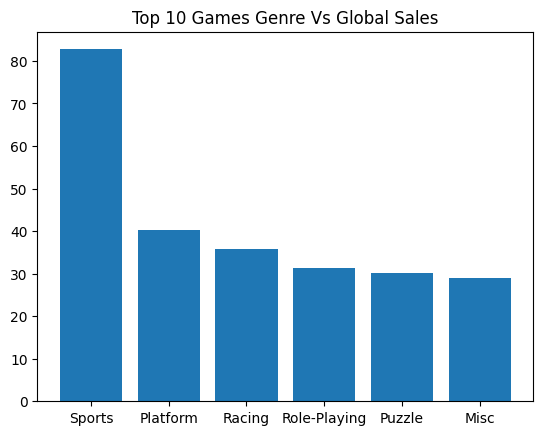

In [ ]:
top_10 = vg_game[vg_game['Global_Sales']>28.31]
plt.bar(top_10['Genre'],top_10['Global_Sales'])
plt.title('Top 10 Games Genre Vs Global Sales')
plt.show()

Here we are checking the information of the data say
- No of columns in the data
- No of row in the data
- No of values in each row
- No of datatype of each row

In [ ]:
vg_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Here we are figuring out the number of missing values in our data in each columns


In [ ]:
vg_game.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Now the missing values amount is so less then we just remove these values from the dataset using the dropna() method

In [ ]:
vg_game.dropna(inplace=True)

Here we are just comfirming that the missing are removed

In [ ]:
vg_game.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

With the removel of the missing values the index of the dataframe is messed up so we are reseting the index using the reset_index method

In [ ]:
vg_game.reset_index(drop=True,inplace=True)

**Question : What are Top 10 games of all the time with respect to Total number of sales?**


To solve the question we are adding the all the sales and makin a new column "Total_Sales"
For this we are using the sum method of the pandas and setting the axis=1 for having the along with the rows.

In [ ]:
vg_game['Total_Sales'] = vg_game[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum(axis=1)

In [ ]:
vg_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.02
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.02
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.01
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.02


To find out the top 10 games according to sales, we have to sort the Total_sales in descending order and then we will pick up top most 10 to analyse top most sales.

In [ ]:
vg_game['Total_Sales'].sort_values(ascending=False)[:10]

0    165.48
1     80.48
2     71.65
3     66.00
4     62.75
5     60.52
6     60.02
7     58.03
8     57.23
9     56.62
Name: Total_Sales, dtype: float64

Now our next step is to pick the data of the top ten games i.e., whose Global_sales is more than 56.62.

In [ ]:
top_10_games = vg_game[vg_game['Total_Sales']>=56.62]

Here we are ploting the graph
- In the first line of code we are setting the figure size
- Then we are rotating label at some angle so won't be overlaped
- Now we are ploting the barplot using the seaborn
- Now just we are setting the title of the graph

Text(0.5, 1.0, 'Top 10 games of all the time')

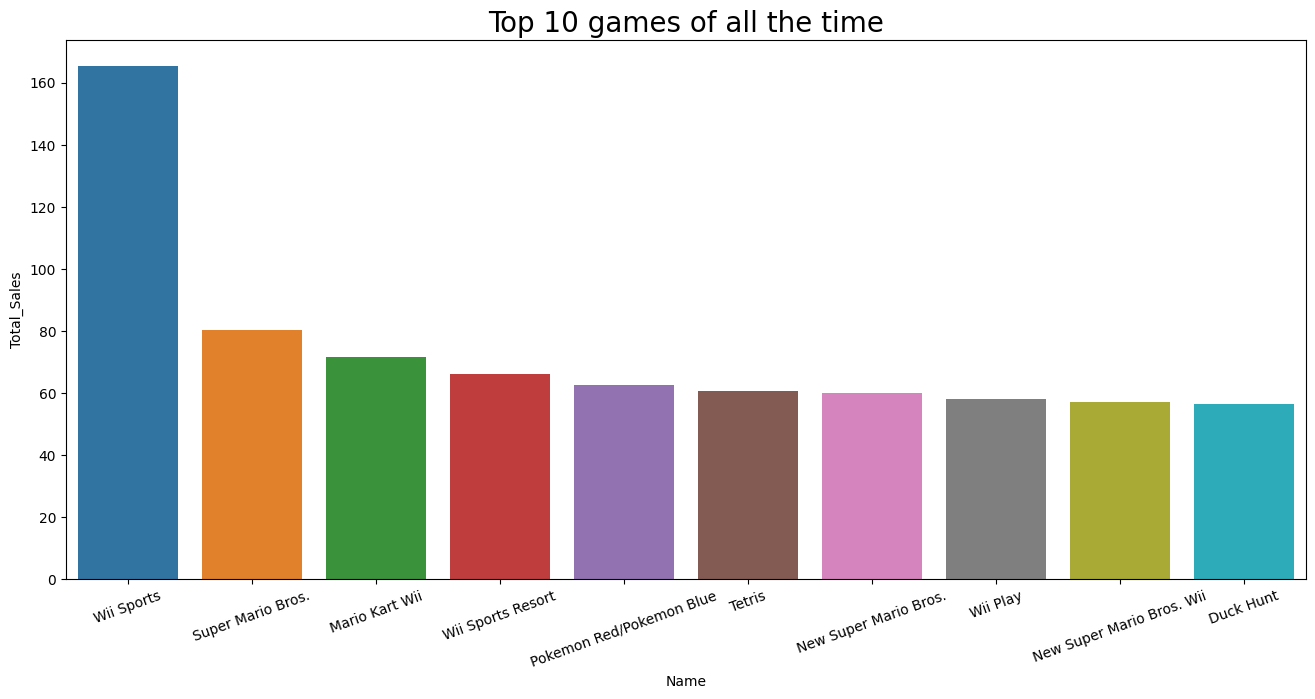

In [ ]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=20)
sns.barplot(data=top_10_games,x='Name',y='Total_Sales')
plt.title("Top 10 games of all the time",size=20)

**Question : How do the total sales of video games in each genre compare when considering only the platforms PC, PS3, PS4, and X360?**

To solve the question we have to filters video game data for four platforms: PC, X360, PS3, and PS4 and have to create a new dataset after filtration. Here’s code for this:

In [ ]:
values=["PC","X360",'PS3','PS4']
pc_and_ps_games = vg_game[vg_game["Platform"].isin(values)]

Here we are ploting the graph
- Setting up the figure size
- Ploting the bargraph using the seaborn

<Axes: xlabel='Genre', ylabel='Total_Sales'>

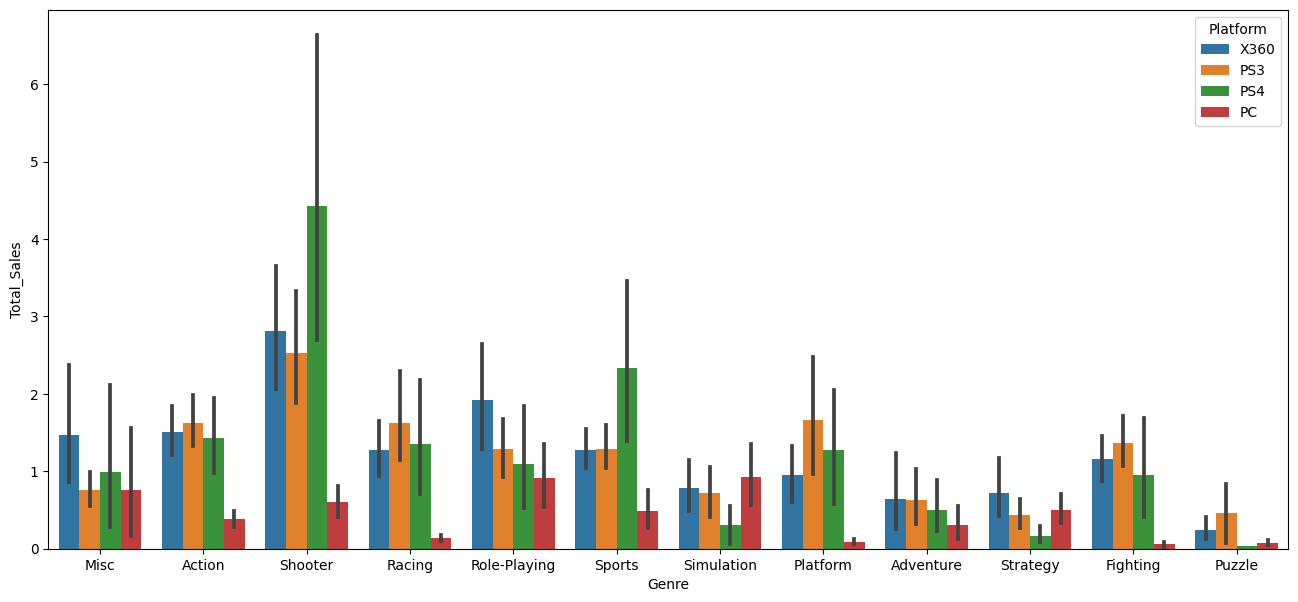

In [ ]:
plt.figure(figsize=(16,7))
sns.barplot(data=pc_and_ps_games,x='Genre',y='Total_Sales',hue='Platform')

**Question: Which are the top three most common video game genres in the dataset, and what is the average global sales figure for each of these genres?**

To know about top three most common video games, we have to find the number of times each category appears in a dataset.

In [ ]:
# Calculate the frequency of each genre
genre_counts = vg_game['Genre'].value_counts()
genre_counts

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

This code identifies the three most common video game genres by first obtaining the top three genres from the previously calculated `genre_counts` and storing them in the `top_three_genres` variable.

In [ ]:
# Get the top three most common genres
top_three_genres = genre_counts.head(3).index
top_three_genres

Index(['Action', 'Sports', 'Misc'], dtype='object')

This code calculates the average global sales for video game genres that belong to the top three most common genres.

In [ ]:
# Calculate the average global sales for each of the top three genres
average_sales_by_genre = vg_game[vg_game['Genre'].isin(top_three_genres)].groupby('Genre')['Global_Sales'].mean()

In [ ]:
average_sales_by_genre

Genre
Action    0.529942
Misc      0.468488
Sports    0.568247
Name: Global_Sales, dtype: float64

Here we are ploting the graph
- In the first line of code we are setting the figure size
- Now we are ploting the barplot using the seaborn
- Now just we are setting the title of the graph
- Now just we are setting the X label of the graph
- Now just we are setting the Y label of the graph
- Then we are rotating label at some angle so won't be overlaped

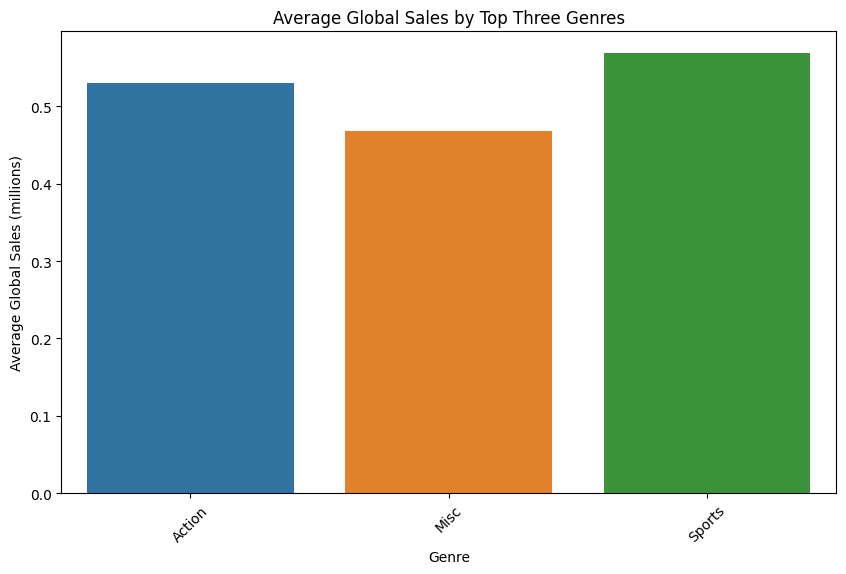

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_sales_by_genre.index, y=average_sales_by_genre.values)
plt.title('Average Global Sales by Top Three Genres')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()